In [1]:
# 📌 Step 1: Data Loading & Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("new_student_dataset_25.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] 
df

,student_id,hours_studied,previous_scores,learning_style,interest_subjects,assignments_done,test_score
0,S001,3.6,83.2,Kinesthetic,Math,92.5,76.3
1,S002,7.7,51.0,Auditory,Math,72.5,72.4
2,S003,6.1,68.3,Auditory,History,54.8,52.2
3,S004,5.2,72.6,Auditory,Math,68.5,96.6
4,S005,2.1,42.6,Auditory,English,83.4,75.9
5,S006,2.1,73.4,Auditory,Math,83.3,81.7
6,S007,1.4,49.4,Auditory,English,79.6,92.8
7,S008,7.1,43.6,Kinesthetic,English,63.7,77.5
8,S009,5.2,92.2,Kinesthetic,English,78.1,57.7
9,S010,6.0,93.1,Auditory,History,69.1,46.3


In [6]:
# 📌 Step 4: Feature Encoding & Scaling
le = LabelEncoder()
df['learning_style_encoded'] = le.fit_transform(df['learning_style'])
df['interest_subject_encoded'] = le.fit_transform(df['interest_subjects'])

features = ['hours_studied', 'previous_scores', 'assignments_done',
            'learning_style_encoded', 'interest_subject_encoded']
X = df[features]
y = df['test_score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 📌 Step 5: Regression Model (Predict Final Score)
reg = LinearRegression()
reg.fit(X_scaled, y)

y_pred = reg.predict(X_scaled)

from sklearn.metrics import r2_score
print("\nR2 Score:", r2_score(y, y_pred))


R2 Score: 0.1612752251552373


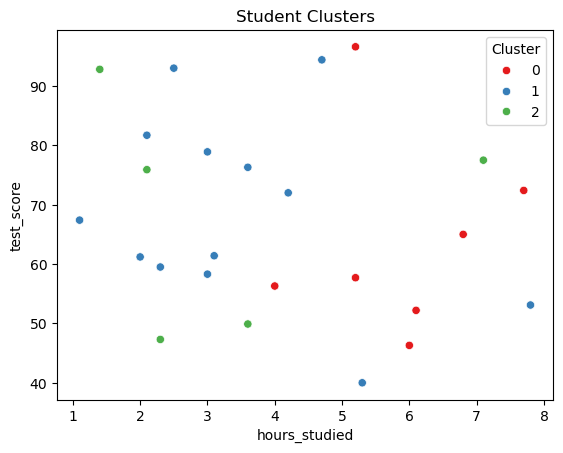

In [8]:
# 📌 Step 6: Clustering (Group Students)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

sns.scatterplot(data=df, x='hours_studied', y='test_score', hue='Cluster', palette='Set1')
plt.title("Student Clusters")
plt.show()

In [9]:
# 📌 Step 7: Personalized Learning Suggestions (Rules Based)
def suggest_learning_path(row):
    if row['Cluster'] == 0:
        return "Needs more assignments practice"
    elif row['Cluster'] == 1:
        return "Focus on theory + interest subjects"
    else:
        return "Consistent, challenge with higher-level material"

# Add suggestions to dataframe
df['suggestion'] = df.apply(suggest_learning_path, axis=1)

# Final view
df[['student_id', 'test_score', 'Cluster', 'suggestion']].head(10)

,student_id,test_score,Cluster,suggestion
0,S001,76.3,1,Focus on theory + interest subjects
1,S002,72.4,0,Needs more assignments practice
2,S003,52.2,0,Needs more assignments practice
3,S004,96.6,0,Needs more assignments practice
4,S005,75.9,2,"Consistent, challenge with higher-level material"
5,S006,81.7,1,Focus on theory + interest subjects
6,S007,92.8,2,"Consistent, challenge with higher-level material"
7,S008,77.5,2,"Consistent, challenge with higher-level material"
8,S009,57.7,0,Needs more assignments practice
9,S010,46.3,0,Needs more assignments practice
